# Conjunto de dados 2

Esses dados contém o número de 'Likes' para cada um dos 9000 usuários, ao longo de 6 meses, agregados diariamente.

Linhas de FBTemporal são usuários e colunas são dias.

In [2]:
import numpy as np
from math import isclose
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
data = np.loadtxt('data/social/data/temporal_data.txt')
temporal = data[:,1:]
pd.DataFrame(temporal[:,:]).head(10)

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
std_temporal = StandardScaler().fit_transform(temporal)

# pd.DataFrame(std_temporal)

In [6]:
pca = PCA(n_components=5)
pca.fit(std_temporal)
normal_subspace = pca.components_.T             # transposing because PCA in sklearn makes each eigenvector become a line instead of a column.
normal_behavior_portion = (np.matmul(np.matmul(normal_subspace, normal_subspace.T), std_temporal.T)).T
residual_behavior_portion = std_temporal - normal_behavior_portion

pd.DataFrame(residual_behavior_portion).head(10)

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,-0.058196,-0.043998,-0.034451,-0.062057,-0.047898,-0.019617,-0.034087,-0.014260,-0.000961,-0.014620,...,-0.051508,0.341607,-0.054222,-0.037112,-0.037082,-0.080446,-0.063212,-0.040300,-0.033617,-0.037242
1,-0.019976,-0.000816,0.001741,-0.027504,-0.006322,0.144884,0.000110,0.018669,0.028079,0.005074,...,-0.012908,-0.022658,-0.021434,-0.019575,-0.020569,-0.014179,-0.020848,-0.029977,-0.024238,-0.025772
2,-0.020795,-0.001645,0.001551,-0.028761,-0.007389,0.013974,0.000053,0.019397,0.029755,0.004217,...,-0.013427,-0.022403,-0.020953,-0.016795,-0.017213,-0.015556,-0.021361,-0.026309,-0.021601,-0.023769
3,-0.027874,-0.009162,-0.006209,-0.034667,-0.013974,0.009650,-0.007408,0.270705,0.023000,0.001843,...,-0.013506,-0.022640,-0.020936,-0.016243,-0.016546,-0.016379,-0.021683,-0.025409,-0.021052,-0.023332
4,-0.018816,-0.000488,0.002114,-0.026820,-0.005114,0.016023,0.001510,0.020406,0.030118,0.007170,...,-0.010554,-0.019468,-0.018474,-0.015581,-0.016582,-0.011896,-0.018465,-0.025827,-0.020470,-0.022969
5,0.268823,-0.040012,-0.035977,-0.067549,-0.048980,-0.013515,-0.046163,-0.022050,-0.007274,-0.020571,...,-0.011816,-0.021470,-0.018814,-0.016509,-0.016317,-0.012158,-0.020695,-0.025537,-0.020223,-0.023833
6,-0.023438,-0.007020,-0.003977,-0.030085,-0.009509,0.012285,-0.002031,0.016349,0.026014,0.007309,...,-0.015935,-0.025706,-0.023109,-0.017325,-0.018290,-0.022267,-0.024459,-0.026397,-0.021286,-0.023975
7,-0.023927,-0.006291,-0.003369,-0.031279,-0.010389,0.012029,-0.003893,0.014946,0.024729,0.005258,...,-0.013206,-0.022983,-0.020978,-0.017827,-0.019098,-0.016748,-0.021549,-0.027865,-0.021806,-0.024508
8,-0.023713,-0.005372,-0.002653,-0.031174,-0.010083,0.012441,-0.003932,0.015130,0.025031,0.004543,...,-0.011842,-0.021341,-0.019843,-0.017299,-0.018415,-0.013891,-0.019996,-0.027520,-0.021708,-0.024180
9,-0.018181,0.000648,0.003078,-0.026056,-0.004326,0.016514,0.002232,0.021068,0.030716,0.006868,...,-0.010545,-0.019412,-0.018688,-0.015989,-0.016804,-0.011207,-0.018325,-0.026237,-0.021199,-0.023250


In [7]:
individual_norms = np.sqrt(np.sum(np.power(residual_behavior_portion, 2), axis = 1))

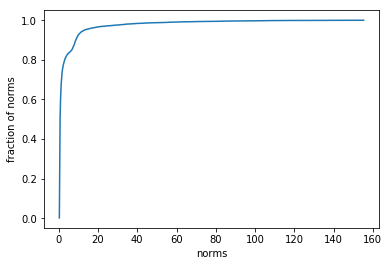

In [8]:
x_values = np.linspace(start=min(individual_norms), stop=max(individual_norms), num=len(individual_norms))
data_size = individual_norms.size

y_values = []
for i in x_values:
    temp = individual_norms[individual_norms <= i]
    value = temp.size / data_size
    y_values.append(value)

plt.plot(x_values, y_values)
plt.xlabel('norms')
plt.ylabel('fraction of norms')
plt.show()

In [9]:
ecdf = ECDF(individual_norms)
threshold = 0
for norm in individual_norms:
    if isclose(ecdf(norm), 0.97, abs_tol=1e-4):
        threshold = norm

print(threshold)
print(ecdf(threshold))

23.490633209999913
0.9699913644214163


In [10]:
anomalous_users = []
normal_users = []
for ind,user_norm in enumerate(individual_norms):
    if user_norm >= threshold:
        anomalous_users.append([ind,user_norm])
    else:
        normal_users.append([ind,user_norm])


df = pd.DataFrame(anomalous_users)
df.columns = ['user #', 'residual behavior portion']
df

,user #,residual behavior portion
0,55,39.400526
1,88,102.620066
2,122,30.529250
3,155,31.297744
4,211,58.842496
5,214,39.691155
6,281,82.932367
7,310,36.006533
8,318,28.482746
9,320,66.911498
